## VODAFONE CUSTOMER CHURN ANALYSIS - TEAM PRETORIA - LP2

### Data Understanding
This is a telecommunications company's customer dataset, containing various demographic and usage information for each customer, as well as whether or not they have churned (i.e. cancelled their service). Here are the meanings of the columns:

- customerID: unique identifier for each customer
- gender: customer gender (Male/Female)
- SeniorCitizen: indicates if the customer is a senior citizen or not (1, 0)
- Partner: indicates if the customer has a partner or not (Yes, No)
- Dependents: indicates if the customer has dependents or not (Yes, No)
- tenure: number of months the customer has stayed with the company
- PhoneService: indicates if the customer has a phone service or not (Yes, No)
- MultipleLines: indicates if the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: type of internet service the customer has (DSL, Fiber optic, No)
- OnlineSecurity: indicates if the customer has online security or not (Yes, No, No internet service)
- DeviceProtection: indicates if the customer has device protection or not (Yes, No, No internet service)
- TechSupport: indicates if the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: indicates if the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: indicates if the customer has streaming movies or not (Yes, No, No internet service)
- Contract: type of contract the customer has (Month-to-month, One year, Two year)
- PaperlessBilling: indicates if the customer has paperless billing or not (Yes, No)
- PaymentMethod: payment method used by the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: amount charged to the customer monthly
- TotalCharges: total amount charged to the customer
- Churn: indicates if the customer has churned or not (Yes, No) 

#### SETUP

##### INSTALLING RELEVAT LIBRARIES


In [2]:
# pip install database interaction library
#%pip install pyodbc
#%pip install plotly
#%pip install statsmodels
#%pip install imblearn 
#%pip install openpyxl
%pip install phik
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


#### IMPORTATION OF LIBRARIES 

In [3]:
import pandas as pd
import pyodbc
import warnings
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
warnings.filterwarnings('ignore')

import phik
import xgboost 

from phik.report import plot_correlation_matrix
from phik import report

#### DATA LOADING

In [4]:
# create server instance variables
server = 'dap-projects-database.database.windows.net'
database = 'dapDB'
username = 'dataAnalyst_LP2'
password = 'A3g@3kR$2y'


#Establish connection with server 
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [5]:
#Connecting to the Server
connection = pyodbc.connect(connection_string)

In [6]:
#Get data from server with query 'Select *'
query = "Select * from dbo.LP2_Telco_churn_first_3000"
sql_data = pd.read_sql(query, connection)

In [7]:
sql_data.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure   
0  7590-VHVEG  Female          False     True       False       1  \
1  5575-GNVDE    Male          False    False       False      34   
2  3668-QPYBK    Male          False    False       False       2   
3  7795-CFOCW    Male          False    False       False      45   
4  9237-HQITU  Female          False    False       False       2   

   PhoneService MultipleLines InternetService OnlineSecurity  ...   
0         False          None             DSL          False  ...  \
1          True         False             DSL           True  ...   
2          True         False             DSL           True  ...   
3         False          None             DSL           True  ...   
4          True         False     Fiber optic          False  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract   
0            False       False       False           False  Month-to-month  \
1             True       False       False           False        One year   
2            False       False       False           False  Month-to-month   
3             True        True       False           False        One year   
4            False       False       False           False  Month-to-month   

  PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges   
0             True           Electronic check      29.850000     29.850000  \
1            False               Mailed check      56.950001   1889.500000   
2             True               Mailed check      53.849998    108.150002   
3            False  Bank transfer (automatic)      42.299999   1840.750000   
4             True           Electronic check      70.699997    151.649994   

   Churn  
0  False  
1  False  
2   True  
3  False  
4   True  

[5 rows x 21 columns]

In [8]:
sql_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [9]:
#read csv for remaining data from GitHub repository
data = pd.read_csv('LP2_Telco-churn-last-2000.csv')
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService   
0  5600-PDUJF    Male              0      No         No       6          Yes  \
1  8292-TYSPY    Male              0      No         No      19          Yes   
2  0567-XRHCU  Female              0     Yes        Yes      69           No   
3  1867-BDVFH    Male              0     Yes        Yes      11          Yes   
4  2067-QYTCF  Female              0     Yes         No      64          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection   
0                No             DSL             No  ...               No  \
1                No             DSL             No  ...              Yes   
2  No phone service             DSL            Yes  ...              Yes   
3               Yes     Fiber optic             No  ...               No   
4               Yes     Fiber optic             No  ...              Yes   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling   
0         Yes          No              No  Month-to-month              Yes  \
1         Yes          No              No  Month-to-month              Yes   
2          No          No             Yes        Two year              Yes   
3          No          No              No  Month-to-month              Yes   
4         Yes         Yes             Yes  Month-to-month              Yes   

             PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Credit card (automatic)          49.50         312.7    No  
1  Credit card (automatic)          55.00        1046.5   Yes  
2  Credit card (automatic)          43.95        2960.1    No  
3         Electronic check          74.35         834.2   Yes  
4         Electronic check         111.15        6953.4    No  

[5 rows x 21 columns]

In [10]:
onedrive_data = pd.read_excel('Telco-churn-second-2000.xlsx')


In [11]:
#Merge dataset
voda_churn_train = pd.concat([sql_data, data, onedrive_data ])
voda_churn_train.to_csv('voda_customer_churn.csv')

#### EXPLORATORY DATA ANALYSIS 

Null Hypothesis: Customers with high monthly charges do not have the tendency to churn 

Alt Hypothesis: Customers with high monthly Charges have the tendency to churn 


Questions 
- How much total charges and Monthly charges did churners generate? 
- Are customers with dependents likely to have higher charges than those without dependents?
- How many Senior Citizens with dependents churn?
- Which internet service is most preferred?
- What is the most common payment method?

In [12]:
sql_data.shape

(3000, 21)

In [13]:
data.shape

(2043, 21)

In [14]:
voda_churn_train.shape

(7043, 21)

In [15]:
voda_df = pd.read_csv('voda_customer_churn.csv')

In [16]:
voda_df.tail()

Unnamed: 0  customerID  gender SeniorCitizen Partner Dependents  tenure   
7038        1995  7912-SYRQT  Female             0      No         No       7  \
7039        1996  3557-HTYWR  Female             0      No         No      47   
7040        1997  4816-JBHOV    Male             1      No         No       2   
7041        1998  8920-NAVAY    Male             1      No         No      62   
7042        1999  1699-TLDLZ  Female             0     Yes        Yes      16   

     PhoneService MultipleLines InternetService  ...     DeviceProtection   
7038          Yes           Yes     Fiber optic  ...                   No  \
7039          Yes           Yes             DSL  ...                   No   
7040          Yes            No             DSL  ...                   No   
7041          Yes           Yes     Fiber optic  ...                  Yes   
7042          Yes            No              No  ...  No internet service   

              TechSupport          StreamingTV      StreamingMovies   
7038                   No                   No                   No  \
7039                  Yes                   No                  Yes   
7040                   No                   No                   No   
7041                  Yes                  Yes                  Yes   
7042  No internet service  No internet service  No internet service   

            Contract PaperlessBilling              PaymentMethod   
7038  Month-to-month              Yes  Bank transfer (automatic)  \
7039        Two year               No               Mailed check   
7040  Month-to-month              Yes           Electronic check   
7041        One year              Yes  Bank transfer (automatic)   
7042        Two year               No               Mailed check   

     MonthlyCharges TotalCharges  Churn  
7038          75.10       552.95    NaN  
7039          74.05       3496.3    NaN  
7040          44.70         93.7    NaN  
7041         110.75      7053.35    NaN  
7042          19.70       301.55    NaN  

[5 rows x 22 columns]

Seems to have an unwanted column called the Unamed:0

In [17]:
voda_df = voda_df.drop('Unnamed: 0', axis = 'columns')

In [18]:
#train_df = voda_churn_train

In [19]:
voda_df.describe()

tenure  MonthlyCharges
count  7043.000000     7043.000000
mean     32.371149       64.761692
std      24.559481       30.090047
min       0.000000       18.250000
25%       9.000000       35.500000
50%      29.000000       70.349998
75%      55.000000       89.850000
max      72.000000      118.750000

In [20]:
#checking number of unique values in every column 
voda_df.nunique()

customerID          7043
gender                 2
SeniorCitizen          4
Partner                4
Dependents             4
tenure                73
PhoneService           4
MultipleLines          5
InternetService        3
OnlineSecurity         5
OnlineBackup           5
DeviceProtection       5
TechSupport            5
StreamingTV            5
StreamingMovies        5
Contract               3
PaperlessBilling       4
PaymentMethod          4
MonthlyCharges      2351
TotalCharges        6701
Churn                  4
dtype: int64

In [21]:
voda_df.isnull().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines        269
InternetService        0
OnlineSecurity       651
OnlineBackup         651
DeviceProtection     651
TechSupport          651
StreamingTV          651
StreamingMovies      651
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           5
Churn               2001
dtype: int64

We can see here that there are some empty values, on both numeric and Caetegorical. for now we will work i=on the numeric one 

In [22]:
# we will replace the empty values the Total Amount column with the mean values
voda_df['TotalCharges'] = pd.to_numeric(voda_df["TotalCharges"], errors= "coerce")

# we therefore will repalce with the mean of the Values in that column 
voda_df['TotalCharges'].fillna(value= voda_df["TotalCharges"].mean().round(3), inplace= True)

In [23]:
# Check duplicated values 
voda_df.duplicated().sum()

0

In [24]:
voda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     6774 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    6392 non-null   object 
 10  OnlineBackup      6392 non-null   object 
 11  DeviceProtection  6392 non-null   object 
 12  TechSupport       6392 non-null   object 
 13  StreamingTV       6392 non-null   object 
 14  StreamingMovies   6392 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Issues identified 
- TotalCharges column in in object instead
- No duplicates 


In [25]:
# Do describe and transpose 
voda_df.describe().T

count         mean          std        min      25%   
tenure          7043.0    32.371149    24.559481   0.000000    9.000  \
MonthlyCharges  7043.0    64.761692    30.090047  18.250000   35.500   
TotalCharges    7043.0  2283.300441  2265.000259  18.799999  402.225   

                        50%          75%      max  
tenure            29.000000    55.000000    72.00  
MonthlyCharges    70.349998    89.850000   118.75  
TotalCharges    1400.550000  3786.599976  8684.80

- #### Checking Columns and their unique values 

In [26]:
voda_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [27]:
#Check Unique values for Columns
print('The unique Value of the Columns are;')
Churn = voda_df.Churn.unique()
print(f"Churn : {Churn} ")

gender = voda_df.gender.unique()
print(f"gender : {gender} ")

SeniorCitizen = voda_df.SeniorCitizen.unique()
print(f"SeniorCitizen : {SeniorCitizen} ")

Partner = voda_df.Partner.unique()
print(f"Partner : {Partner} ")

Dependents = voda_df.Dependents.unique()
print(f"Dependents : {Dependents} ")

tenure = voda_df.tenure.unique()
print(f"tenure : {tenure} ")

PhoneService = voda_df.PhoneService.unique()
print(f"PhoneService : {PhoneService} ")

MultipleLines = voda_df.MultipleLines.unique()
print(f"MultipleLines : {MultipleLines} ")

InternetService = voda_df.InternetService.unique()
print(f"InternetService : {InternetService} ")

OnlineSecurity = voda_df.OnlineSecurity.unique()
print(f"OnlineSecurity : {OnlineSecurity} ")

OnlineBackup = voda_df.OnlineBackup.unique()
print(f"OnlineBackup : {OnlineBackup} ")

DeviceProtection = voda_df.DeviceProtection.unique()
print(f"DeviceProtection : {DeviceProtection} ")

TechSupport = voda_df.TechSupport.unique()
print(f"TechSupport : {TechSupport} ")

StreamingTV = voda_df.StreamingTV.unique()
print(f"StreamingTV : {StreamingTV} ")

StreamingMovies = voda_df.StreamingMovies.unique()
print(f"StreamingMovies : {StreamingMovies} ")

Contract = voda_df.Contract.unique()
print(f"Contract : {Contract} ")

PaperlessBilling = voda_df.PaperlessBilling.unique()
print(f"PaperlessBilling : {PaperlessBilling} ")

PaymentMethod = voda_df.PaymentMethod.unique()
print(f"PaymentMethod : {PaymentMethod} ")

MonthlyCharges = voda_df.MonthlyCharges.unique()
print(f"MonthlyCharges : {MonthlyCharges} ")

TotalCharges = voda_df.TotalCharges.unique()
print(f"TotalCharges : {TotalCharges} ")

The unique Value of the Columns are;
Churn : ['False' 'True' nan 'No' 'Yes'] 
gender : ['Female' 'Male'] 
SeniorCitizen : ['False' 'True' '0' '1'] 
Partner : ['True' 'False' 'No' 'Yes'] 
Dependents : ['False' 'True' 'No' 'Yes'] 
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 
PhoneService : ['False' 'True' 'Yes' 'No'] 
MultipleLines : [nan 'False' 'True' 'No' 'No phone service' 'Yes'] 
InternetService : ['DSL' 'Fiber optic' 'No'] 
OnlineSecurity : ['False' 'True' nan 'No' 'Yes' 'No internet service'] 
OnlineBackup : ['True' 'False' nan 'No' 'Yes' 'No internet service'] 
DeviceProtection : ['False' 'True' nan 'No' 'Yes' 'No internet service'] 
TechSupport : ['False' 'True' nan 'Yes' 'No' 'No internet service'] 
StreamingTV : ['False' 'True' nan 'No' 'Yes' 'No internet service'] 
StreamingMovies : ['False

In [28]:
voda_df['Churn'] = voda_df['Churn'].str.replace('False', 'No')
voda_df['Churn'] = voda_df['Churn'].str.replace('True', 'Yes')

#Senior Citizen Column 
voda_df['SeniorCitizen'] = voda_df['SeniorCitizen'].str.replace( '0','False')
voda_df['SeniorCitizen'] = voda_df['SeniorCitizen'].str.replace('1','True')

#Partner Column 
voda_df['Partner'] = voda_df['Partner'].str.replace('False', 'No')
voda_df['Partner'] = voda_df['Partner'].str.replace('True', 'Yes')

#Online Security 
voda_df['OnlineSecurity'] = voda_df['OnlineSecurity'].str.replace('False', 'No')
voda_df['OnlineSecurity'] = voda_df['OnlineSecurity'].str.replace('True', 'Yes')
voda_df['OnlineSecurity'] = voda_df['OnlineSecurity'].str.replace('No internet service', 'No')

#Dependents Column
voda_df['Dependents'] = voda_df['Dependents'].str.replace('False', 'No')
voda_df['Dependents'] = voda_df['Dependents'].str.replace('True', 'Yes')

#PhoneService Column
voda_df['PhoneService'] = voda_df['PhoneService'].str.replace('False', 'No')
voda_df['PhoneService'] = voda_df['PhoneService'].str.replace('True', 'Yes')

#MultipleLines Column
voda_df['MultipleLines'] = voda_df['MultipleLines'].str.replace('False', 'No')
voda_df['MultipleLines'] = voda_df['MultipleLines'].str.replace('True', 'Yes')
voda_df['MultipleLines'] = voda_df['MultipleLines'].str.replace('No phone service', 'No')

#Online Backup 
voda_df['OnlineBackup'] = voda_df['OnlineBackup'].str.replace('False', 'No')
voda_df['OnlineBackup'] = voda_df['OnlineBackup'].str.replace('True', 'Yes')
voda_df['OnlineBackup'] = voda_df['OnlineBackup'].str.replace('No internet service', 'No')

#DeviceProtection
voda_df['DeviceProtection'] = voda_df['DeviceProtection'].str.replace('False', 'No')
voda_df['DeviceProtection'] = voda_df['DeviceProtection'].str.replace('True', 'Yes')
voda_df['DeviceProtection'] = voda_df['DeviceProtection'].str.replace('No internet service', 'No')

#TechSupport
voda_df['TechSupport'] = voda_df['TechSupport'].str.replace('False', 'No')
voda_df['TechSupport'] = voda_df['TechSupport'].str.replace('True', 'Yes')
voda_df['TechSupport'] = voda_df['TechSupport'].str.replace('No internet service', 'No')

#TechSupport
voda_df['TechSupport'] = voda_df['TechSupport'].str.replace('False', 'No')
voda_df['TechSupport'] = voda_df['TechSupport'].str.replace('True', 'Yes')
voda_df['TechSupport'] = voda_df['TechSupport'].str.replace('No internet service', 'No')

#StreamingTV
voda_df['StreamingTV'] = voda_df['StreamingTV'].str.replace('False', 'No')
voda_df['StreamingTV'] = voda_df['StreamingTV'].str.replace('True', 'Yes')
voda_df['StreamingTV'] = voda_df['StreamingTV'].str.replace('No internet service', 'No')

#StreamingMovies
voda_df['StreamingMovies'] = voda_df['StreamingMovies'].str.replace('False', 'No')
voda_df['StreamingMovies'] = voda_df['StreamingMovies'].str.replace('True', 'Yes')
voda_df['StreamingMovies'] = voda_df['StreamingMovies'].str.replace('No internet service', 'No')

#PaperlessBilling
voda_df['PaperlessBilling'] = voda_df['PaperlessBilling'].str.replace('False', 'No')
voda_df['PaperlessBilling'] = voda_df['PaperlessBilling'].str.replace('True', 'Yes')



#### UNIVARIATE

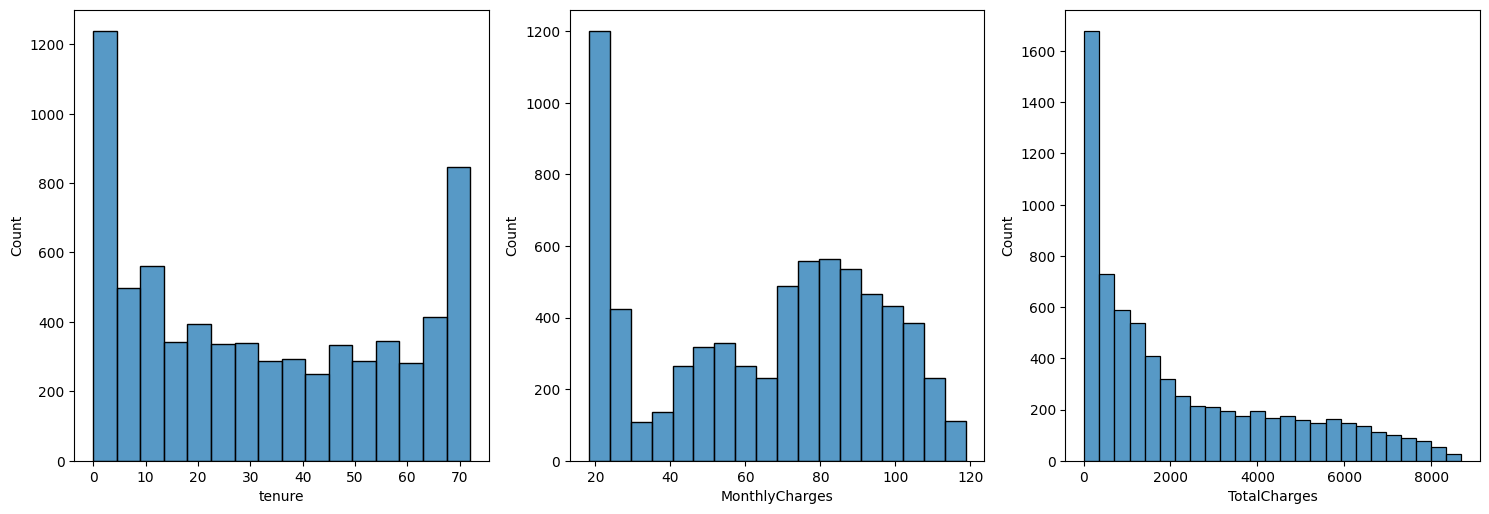

In [29]:
#Count of Numeric columns 
cols = 3
rows = 3
num_cols =voda_df.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = voda_df[col], ax = ax)
    
fig.tight_layout()  
plt.show()

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

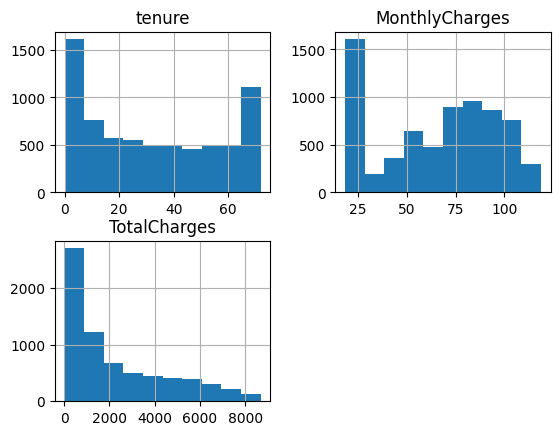

In [30]:
voda_df.hist()

In [31]:
fig= px.histogram(data_frame= voda_df, x="MonthlyCharges", color= "Churn", facet_col= "Churn", nbins= 50,
                  title= "Monthly Charge with Respect to Churn")

fig.show()

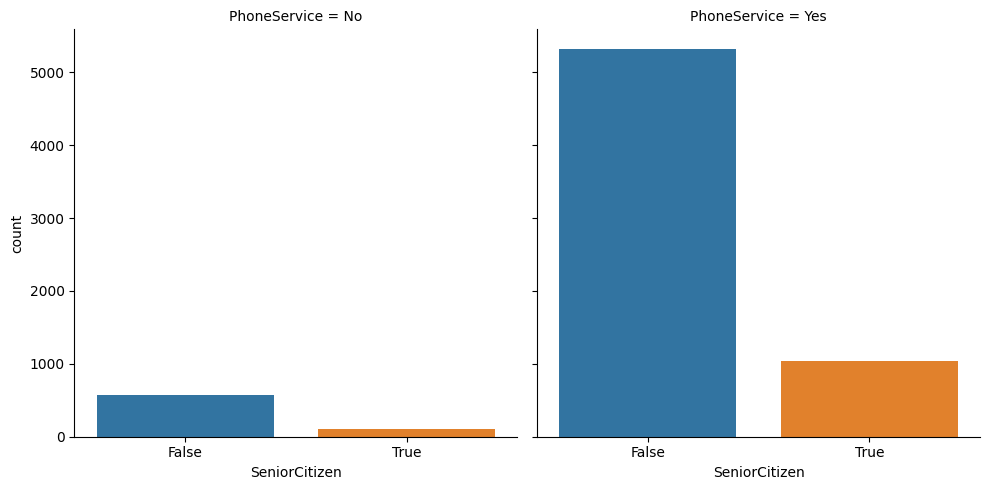

In [32]:
sns.catplot(data=voda_df, x= 'SeniorCitizen', kind='count', col='PhoneService')

##### Check for outliers

<Axes: >

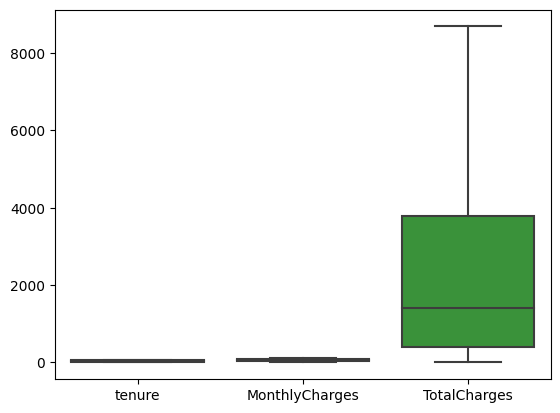

In [33]:
sns.boxplot(data=voda_df)

It is observed that there are no outliers 

####  BIVARIATE ANALYSIS 

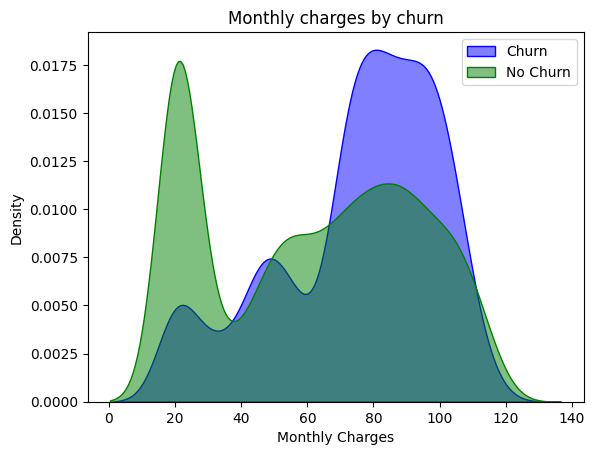

In [34]:
Mth_Chgs = sns.kdeplot(voda_df.MonthlyCharges[(voda_df["Churn"] == 'Yes') ],
                color="Blue", fill = True, alpha=.5)
Mth_Chgs = sns.kdeplot(voda_df.MonthlyCharges[(voda_df["Churn"] == 'No') ],
                ax =Mth_Chgs, color="Green", fill= True, alpha=.5)

Mth_Chgs.legend(["Churn", "No Churn"],loc='upper right')
Mth_Chgs.set_ylabel('Density')
Mth_Chgs.set_xlabel('Monthly Charges')
Mth_Chgs.set_title('Monthly charges by churn')

plt.show()


In [35]:
# Compare rate of Churn With All the Variables 
for i, predictor in enumerate(voda_df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    fig = px.histogram(voda_df, x=predictor,  color='Churn', barmode='group',
                       color_discrete_sequence=['#1f77b4', '#aec7e8'],
                       title=f"Countplot of {predictor} by Churn")
    fig.update_layout(xaxis_title=predictor, yaxis_title="Count",
                      legend_title="Churn", height=400)
    fig.show()

In [36]:
fig = px.scatter(data_frame=voda_df, x='MonthlyCharges', y='TotalCharges', 
                 trendline='ols', color='Churn', title='Monthly Charges vs Total Charges')

fig.update_layout(xaxis_title='Monthly Charges', yaxis_title='Total Charges',
                  margin=dict(l=50, r=50, t=50, b=50), height=400)

fig.show()

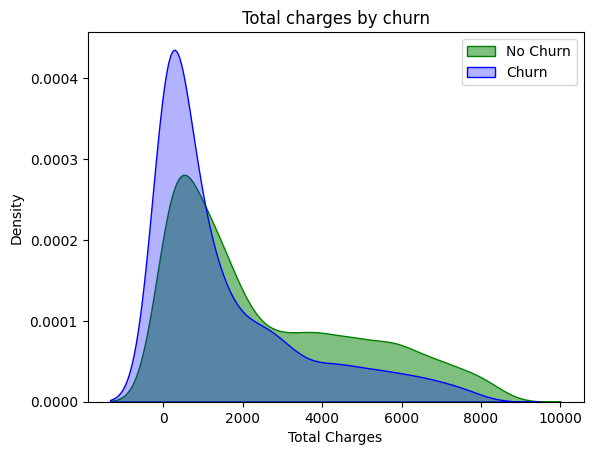

In [37]:
tot_Chgs = sns.kdeplot(voda_df.TotalCharges[(voda_df["Churn"] == 'No') ],
                color="Green", fill=True, alpha=.5)
tot_Chgs = sns.kdeplot(voda_df.TotalCharges[(voda_df["Churn"] == 'Yes') ],
                ax =tot_Chgs, color="Blue", fill=True, alpha=.3)
tot_Chgs.legend(["No Churn","Churn"],loc='upper right')
tot_Chgs.set_ylabel('Density')
tot_Chgs.set_xlabel('Total Charges')
tot_Chgs.set_title('Total charges by churn');


<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

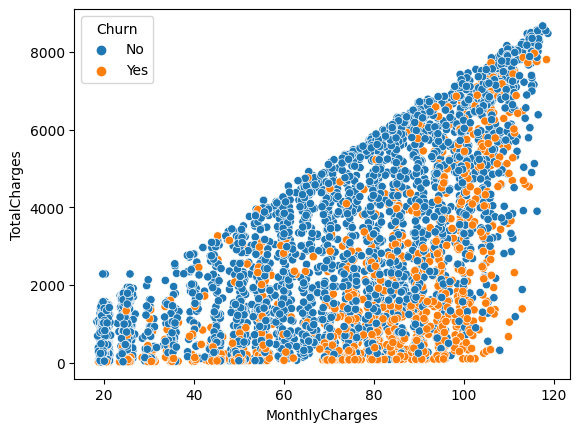

In [38]:
sns.scatterplot(data= voda_df,x="MonthlyCharges", y= "TotalCharges", hue= "Churn")

In [39]:
fig_5= px.scatter(voda_df, x="tenure", y= "TotalCharges", color= "Churn", title= "Relationship Between Tenure and Total Charges")
#offline.iplot(fig_5)
fig_5.show()

#### MULTIVARIATE ANALYSIS

In [40]:
voda_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

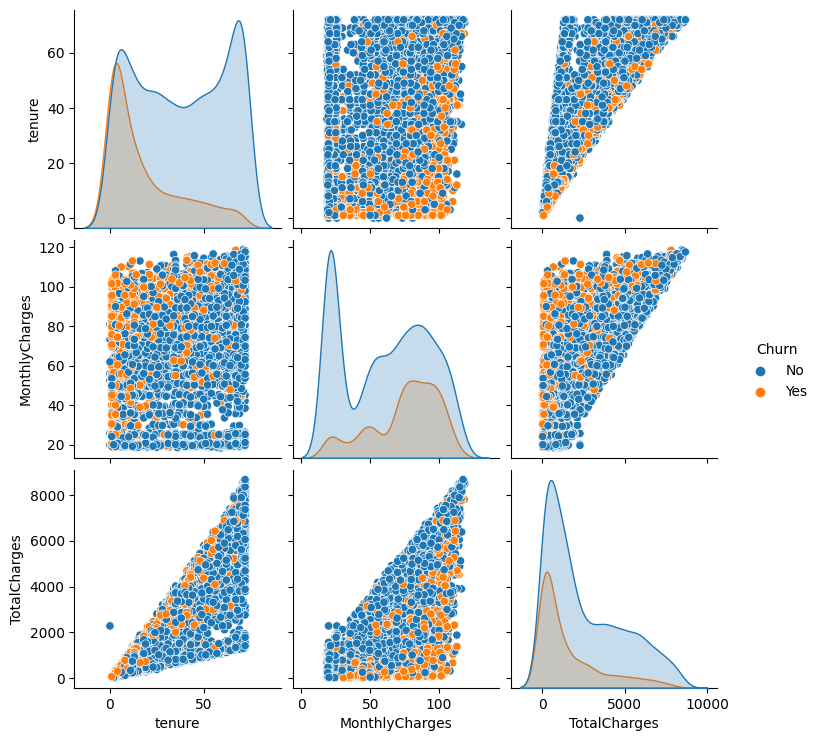

In [41]:
sns.pairplot(voda_df, hue= 'Churn')

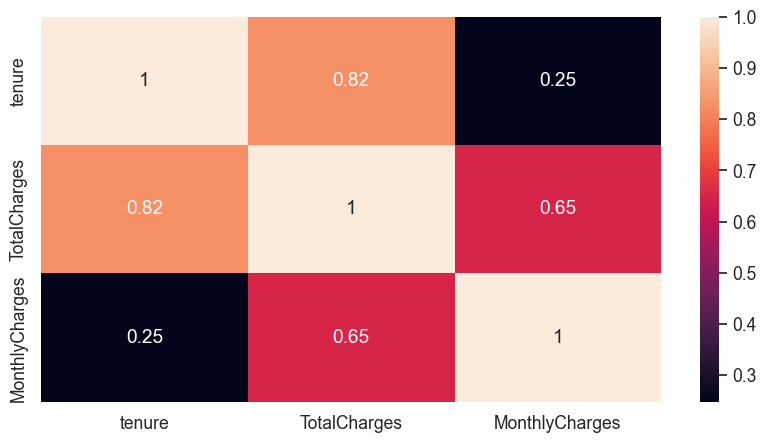

In [42]:
df = voda_df[['tenure','TotalCharges','MonthlyCharges']]
sns.set(font_scale=1.15)
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True);

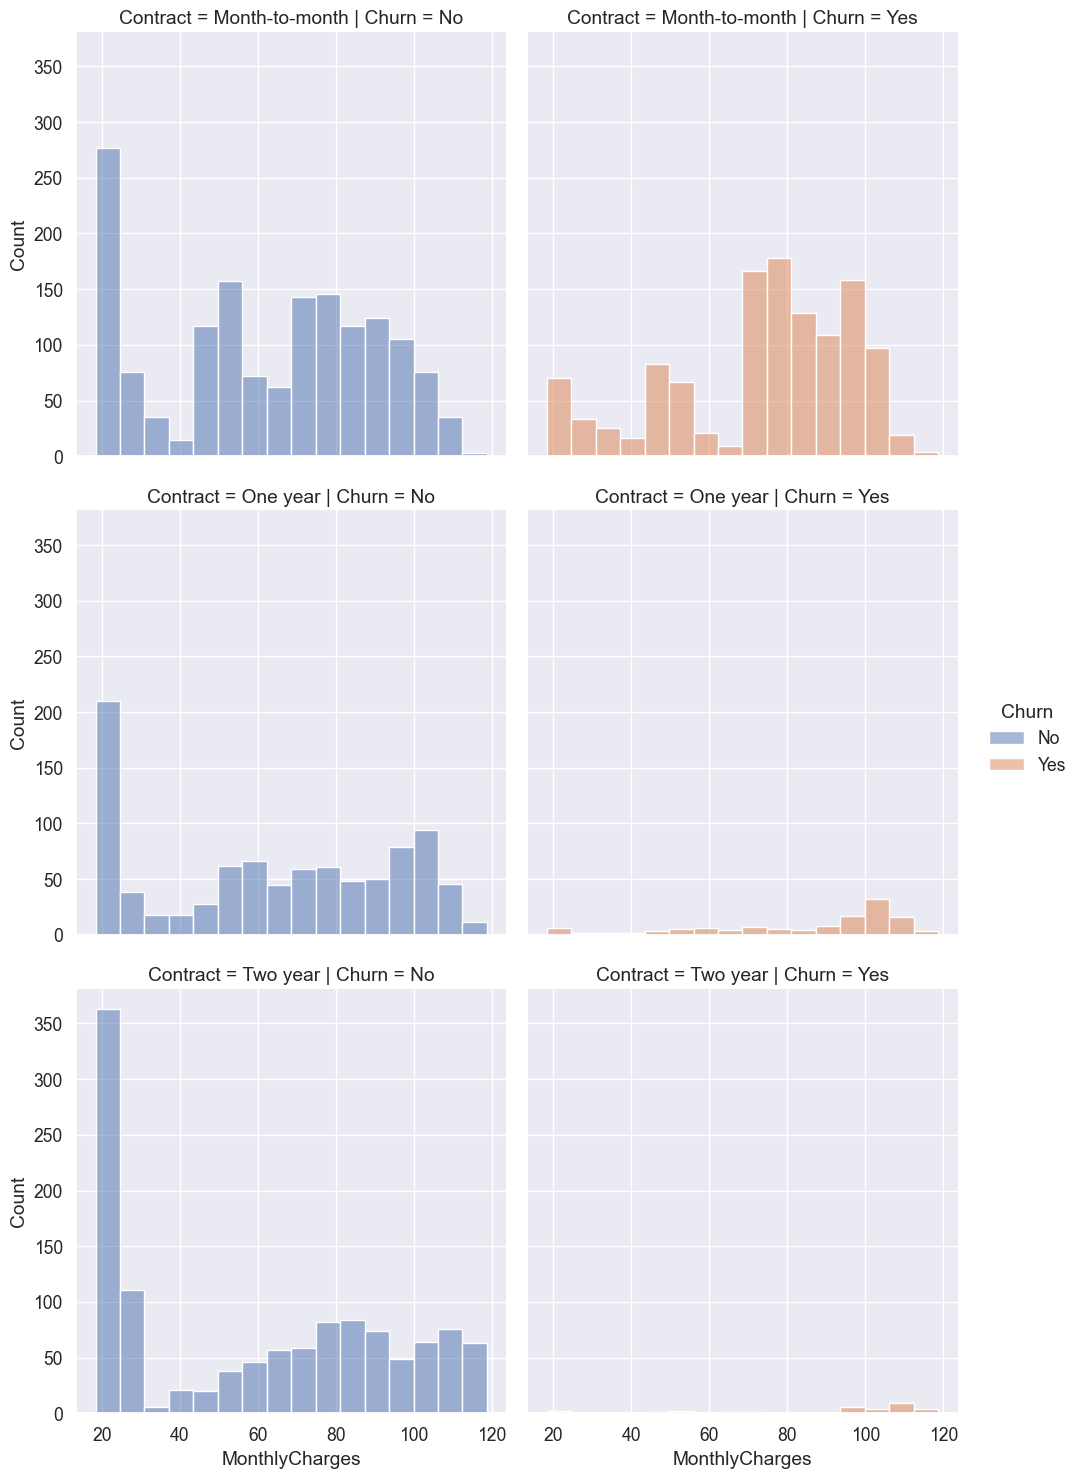

In [43]:
sns.displot(data= voda_df, x= "MonthlyCharges", hue= "Churn", row= "Contract", col= "Churn",height=5,
    aspect=1)

In [44]:
voda_df.dtypes


customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [45]:
#voda_churn_train['TotalCharges'].astype('float')
voda_df['TotalCharges'] = pd.to_numeric(voda_df.TotalCharges, errors='coerce')
voda_df['TotalCharges'].dtype

dtype('float64')

### ANSWERING ANALYTICAL QUESTIONS 

#### 1. How much revenue did churners generate?

In [46]:
churn_df= voda_df[voda_df["Churn"]== "Yes"]
amount = churn_df.agg({"MonthlyCharges": "sum", "TotalCharges": "sum"}).reset_index()

amount.columns = ["Charge", "Amount"]

fig = px.bar(data_frame= amount, x= "Charge",
       y= "Amount", title= "Revenue Generated By Churners", text= "Amount", color= "Charge",
             color_discrete_sequence= ["red", "blue"])
fig.show()

Here we can see that Churners Generate a monthly revenue of Ghc 100,481.90 and a Total Revenue of Ghc 2,092,874.25

#### 2. Are customers with dependents likely to have higher charges than those with dependents?

In [47]:
# Group Customers with Dependency and total charges
cus_depdts = px.box(data_frame=voda_df, x='Dependents', y='TotalCharges', color='Dependents',
             category_orders={'Dependents': ['No', 'Yes']})
cus_depdts.update_layout(title='Distribution of Total Charges by Dependents Status',
                  xaxis_title='Dependents', yaxis_title='Total Charges')
cus_depdts.show()

From the Boxplot we can see that people with dependants have incure higher charges with an average charge of Ghc 1,601.25 than people without dependents with average charge of Ghc 1,322.5

#### 3. How many senior citizens with dependents churn?

In [48]:
Senior_dept = voda_df[(voda_df["Churn"]== "Yes")&(voda_df["Dependents"]== "Yes")]
snrc_dep = px.histogram(x="SeniorCitizen", data_frame=Senior_dept, color= "SeniorCitizen", color_discrete_sequence=["rosybrown", "plum"], 
             title= "Senior Citizen with Dependents Who Churned")
snrc_dep.show()

We realise that the number of Senior Citizen who have dependents are 237 and 16 of them Churn. 

#### 4. Which Internet Service is most preferred?

In [49]:
#Group customer ID by internet services 
inter_serv = voda_df.groupby('InternetService')['customerID'].count().reset_index()
inter_serv.rename(columns={'customerID':'Count'}, inplace =True)
inter_serv

InternetService  Count
0             DSL   2421
1     Fiber optic   3096
2              No   1526

In [50]:
#Visualizing 
count_inter_serv = inter_serv['Count']
Product = inter_serv['InternetService']

fig = px.pie(values=count_inter_serv, names=Product, title='Most Preferred InternetService ', 
             color_discrete_sequence=px.colors.sequential.Redor, 
             labels={'value': 'Count'})

fig.update_traces(textposition='inside', textinfo='percent+label') 
fig.show()

The most preferred internet Service is Fiber Obtic

#### 5. What is the most common payment method?

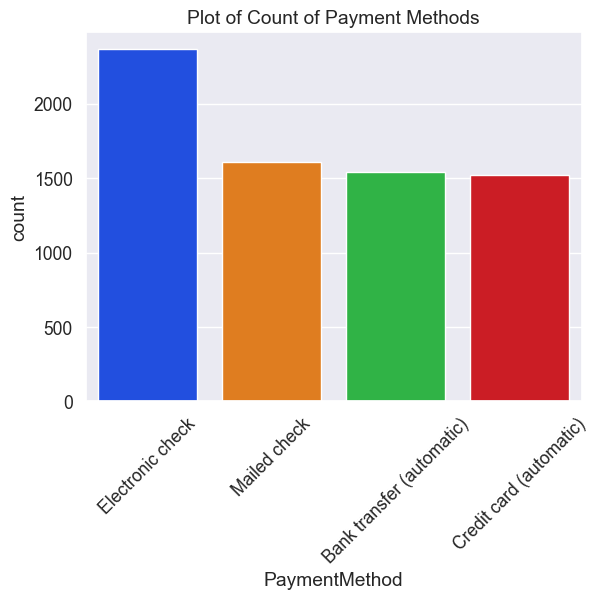

<Figure size 1000x500 with 0 Axes>

In [51]:
sns.countplot(x="PaymentMethod", data=voda_df, palette= "bright"  )
plt.title("Plot of Count of Payment Methods")
plt.xticks(rotation= 45)
plt.figure(figsize= (10,5))
plt.show()

According to our Bargraph we can deduce that the most common Payment method is Electronic Check

### MODELING

In [52]:
df = voda_df

### FEATURE SELECTION 

Here we will be selecting Feature that have a correlation with the churn

Since we have both categorical and Numeric Dataset, we would use the Phi_k(𝜙k) test, which is able to deal with both categorical and numerical dataset other than the Pearson that work on only Numeric dataset

In [53]:
#Get feature that have a correlation with Churn
churn_corr= df.phik_matrix().loc["Churn"]

interval columns not set, guessing: ['tenure', 'MonthlyCharges', 'TotalCharges']


In [54]:
#Sort values 
churn_corr=churn_corr.sort_values()
churn_corr

gender              0.000000
PhoneService        0.000000
StreamingTV         0.000000
StreamingMovies     0.021617
MultipleLines       0.057938
DeviceProtection    0.191848
InternetService     0.203295
Partner             0.218233
OnlineBackup        0.224387
SeniorCitizen       0.231287
Contract            0.256727
Dependents          0.264844
TotalCharges        0.276545
PaperlessBilling    0.297809
OnlineSecurity      0.350289
TechSupport         0.353903
MonthlyCharges      0.371227
PaymentMethod       0.435156
tenure              0.471027
customerID          1.000000
Churn               1.000000
Name: Churn, dtype: float64

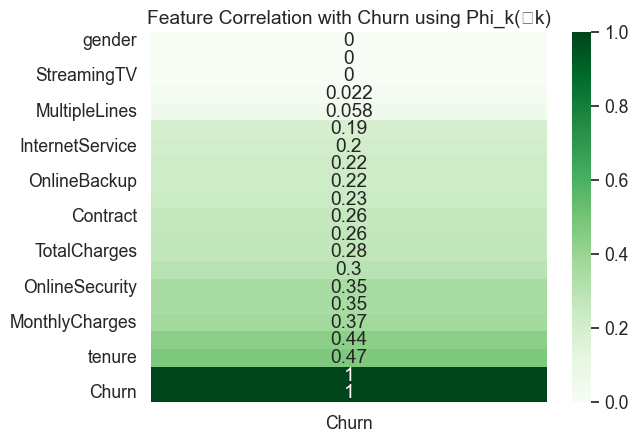

<Figure size 1000x1500 with 0 Axes>

In [56]:
#plot Phi_k(𝜙k) correlation Matrix
sns.heatmap(churn_corr.to_frame(), annot= True, cmap= "Greens")
plt.title("Feature Correlation with Churn using Phi_k(𝜙k)")
plt.figure(figsize= (10,15));

we are going to drop feature whose correlation is between o.2